In [2]:
import stellgap as sg
import numpy as np

In [3]:
stellgap_results = sg.AlfvenSpecData.from_dir('.')

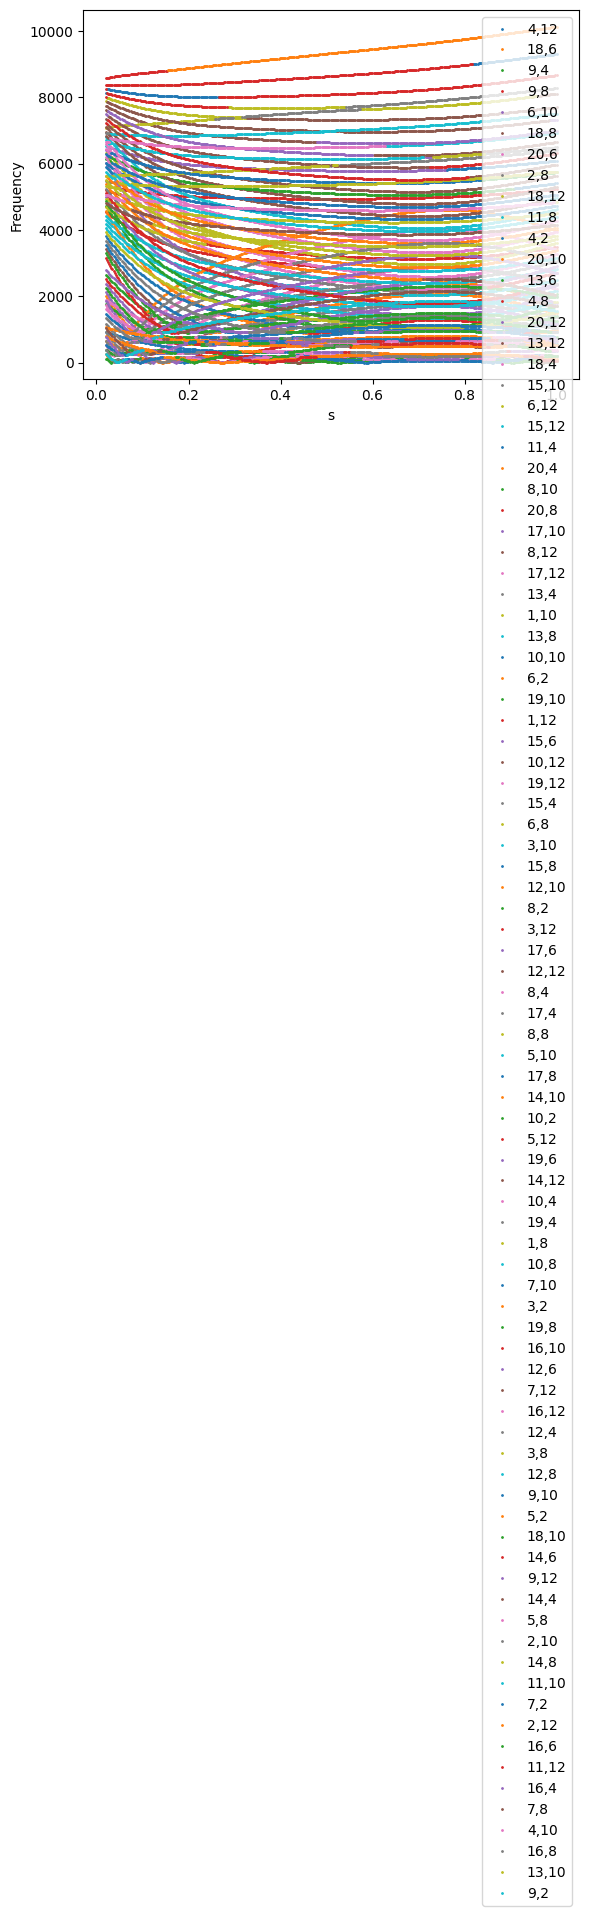

In [4]:
import matplotlib.pyplot as plt

modes = stellgap_results.get_modes()


plt.figure()
for i in range(len(modes)):
    plt.plot(modes[i].s,  modes[i].freq,  marker='o', linestyle='none', markersize=1, label=f'{modes[i].m},{modes[i].n}') 

plt.xlabel("s")
plt.ylabel("Frequency")
plt.legend()         
plt.show()


In [271]:
def heatmapMaker(modes):

    maxarraysizefinder = np.zeros(len(modes), dtype=float)
    for i in range(len(modes)):
        maxarraysizefinder[i] = modes[i].s.size
    maxArraySize = int(max(maxarraysizefinder)) # finds max array size of all modes


    maxfreqfinder = np.zeros(len(modes), dtype = float)
    for i in range(len(modes)):
        maxfreqfinder[i] = max(modes[i].freq) # finds max frequency of all modes
    maxFreq = max(maxfreqfinder)

    modePadder = np.zeros(len(modes), dtype = object)
    for i in range(len(modes)):
        modePadder[i] = np.pad(modes[i].freq, (0, maxArraySize - modes[i].freq.size), mode = 'constant', constant_values=0) # pads the end of smaller arrays with 0


    new_modes = np.zeros(len(modes), dtype = object)
    for i in range(len(modes)):
        new_modes[i] = [modePadder[i] / maxFreq, (modes[i].m,modes[i].n)] 

    M = np.zeros((maxArraySize,maxArraySize), dtype = float)
    for j in range(len(modes)):
        for i in range(maxArraySize):
            row_idx = int(new_modes[j][0][i] * (maxArraySize - 1))
            print(new_modes[j][0][i])
            M[row_idx, i] = 1
    return M

# scan left to right, noting swaps and intersections    

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def all_modes_2d_mn(modes, nbins_s, nbins_f):
    
    s_vals_all = np.concatenate([m.s for m in modes])
    f_vals_all = np.concatenate([m.freq for m in modes])
    s_min, s_max = s_vals_all.min(), s_vals_all.max()
    f_min, f_max = f_vals_all.min(), f_vals_all.max()

    # standard 2D histogram for counts
    heatmap, s_edges, f_edges = np.histogram2d(
        s_vals_all,
        f_vals_all,
        bins=[nbins_s, nbins_f],
        range=[[s_min, s_max], [f_min, f_max]]
    )

    # create a 2D array of shape (nbins_s, nbins_f), dtype=object.
    # each cell is initially an array [0, 0].
    mn_array = np.empty((nbins_s, nbins_f), dtype=object)
    for i in range(nbins_s):
        for j in range(nbins_f):
            mn_array[i, j] = np.array([0, 0], dtype=int)

    # fill mn_array with [m, n] for the last mode's point that lands in each bin
    for mode in modes:
        for s_pt, f_pt in zip(mode.s, mode.freq):
            bin_s = np.searchsorted(s_edges, s_pt) - 1
            bin_f = np.searchsorted(f_edges, f_pt) - 1
            if 0 <= bin_s < nbins_s and 0 <= bin_f < nbins_f:
                mn_array[bin_s, bin_f] = np.array([mode.m, mode.n], dtype=int)
    return heatmap, s_edges, f_edges, mn_array


"""
plt.imshow(
    all_modes_2d_mn(modes, nbins_s=300, nbins_f=300)[0].T,
    origin='lower',
    extent=[s_edges[0], s_edges[-1], f_edges[0], f_edges[-1]],
    aspect='auto',
    cmap='plasma'
)
plt.colorbar()
plt.xlabel('s')
plt.ylabel('Frequency')
plt.show()
"""

"\nplt.imshow(\n    all_modes_2d_mn(modes, nbins_s=300, nbins_f=300)[0].T,\n    origin='lower',\n    extent=[s_edges[0], s_edges[-1], f_edges[0], f_edges[-1]],\n    aspect='auto',\n    cmap='plasma'\n)\nplt.colorbar()\nplt.xlabel('s')\nplt.ylabel('Frequency')\nplt.show()\n"

In [6]:
import numpy as np

def one_modes_2d_mn(modes, nbins_s, nbins_f, mode_number):
    """
    Builds a 2D histogram for only one mode (mode_number),
    but uses the global min/max from *all* modes so the bins
    remain consistent across all modes.
    """

    s_vals_global = np.concatenate([m.s for m in modes])
    f_vals_global = np.concatenate([m.freq for m in modes])
    
    s_min, s_max = s_vals_global.min(), s_vals_global.max()
    f_min, f_max = f_vals_global.min(), f_vals_global.max()


    mode = modes[mode_number]
    s_vals_all = np.array(mode.s)
    f_vals_all = np.array(mode.freq)


    heatmap, s_edges, f_edges = np.histogram2d(
        s_vals_all,
        f_vals_all,
        bins=[nbins_s, nbins_f],
        range=[[s_min, s_max], [f_min, f_max]]
    )


    mn_array = np.empty((nbins_s, nbins_f), dtype=object)
    for i in range(nbins_s):
        for j in range(nbins_f):
            mn_array[i, j] = np.array([0, 0], dtype=int)

    for s_pt, f_pt in zip(mode.s, mode.freq):
        bin_s = np.searchsorted(s_edges, s_pt) - 1
        bin_f = np.searchsorted(f_edges, f_pt) - 1
        if 0 <= bin_s < nbins_s and 0 <= bin_f < nbins_f:
            mn_array[bin_s, bin_f] = np.array([mode.m, mode.n], dtype=int)

    return heatmap, s_edges, f_edges, mn_array



"""
plt.imshow(
    one_modes_2d_mn(modes, nbins_s=300, nbins_f=300, mode_number=0)[0].T,
    origin='lower',
    extent=[s_edges[0], s_edges[-1], f_edges[0], f_edges[-1]],
    aspect='auto',
    cmap='plasma'
)
plt.colorbar()
plt.xlabel('s')
plt.ylabel('Frequency')
plt.show()
"""

"\nplt.imshow(\n    one_modes_2d_mn(modes, nbins_s=300, nbins_f=300, mode_number=0)[0].T,\n    origin='lower',\n    extent=[s_edges[0], s_edges[-1], f_edges[0], f_edges[-1]],\n    aspect='auto',\n    cmap='plasma'\n)\nplt.colorbar()\nplt.xlabel('s')\nplt.ylabel('Frequency')\nplt.show()\n"

In [85]:
sbins=300
fbins=1200
p = 6
modes_heatmap = all_modes_2d_mn(modes, nbins_s=sbins, nbins_f=fbins)[0].T
oneModesNumbers_heatmap = one_modes_2d_mn(modes, nbins_s=sbins, nbins_f=fbins, mode_number=p)[3].T
modesNumbers_heatmap = all_modes_2d_mn(modes, nbins_s=sbins, nbins_f=fbins)[3].T

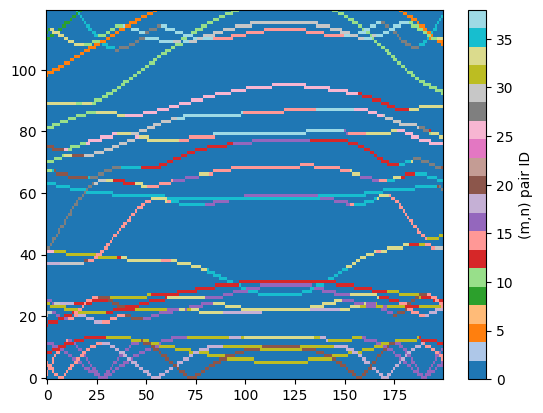

In [102]:
pairID_array = pair_mn_to_ids(modesNumbers_heatmap)

plt.figure()
plt.imshow(
    pairID_array[0:int(0.1*fbins),100:],
    origin="lower",
    interpolation="none",
    cmap='tab20',
    aspect='auto'
)
plt.colorbar(label="(m,n) pair ID")



plt.show()

In [100]:
oneModesNumbers_heatmap_storage = np.empty(len(modes), dtype=object)

for i in range(len(modes)):
    oneModesNumbers_heatmap_storage[i] = one_modes_2d_mn(modes, nbins_s=sbins, nbins_f=fbins, mode_number=i)[3].T


========== Array[0]: THRESHOLD PASS ==========
storage[0]: No non-zero in col=99 for rows up to 120. Can't start.

========== Array[0]: MULTI-FRACTION PASSES (1/4, 1/2, 3/4) ==========
storage[0]: No non-zero in fraction_col=149, fraction=0.25
storage[0]: No non-zero in fraction_col=199, fraction=0.50
=== fraction=0.75 pass in storage[0] col=249, row=1069 ===
walked array[0] => ended at (r=1066, c=244), val=[ 4 12].

  ==> bridge from array[0] at (r=1066, c=244) to array[43] at (r=1065, c=243). Δm=-1, Δn=0

walked array[43] => ended at (r=992, c=0), val=[ 3 12].

No bridging found after array[43], dir=-1.

walked array[0] => ended at (r=1101, c=299), val=[ 4 12].

No bridging found after array[0], dir=1.


========== Array[1]: THRESHOLD PASS ==========
storage[1]: No non-zero in col=99 for rows up to 120. Can't start.

========== Array[1]: MULTI-FRACTION PASSES (1/4, 1/2, 3/4) ==========
=== fraction=0.25 pass in storage[1] col=149, row=205 ===
walked array[1] => ended at (r=204, c=14

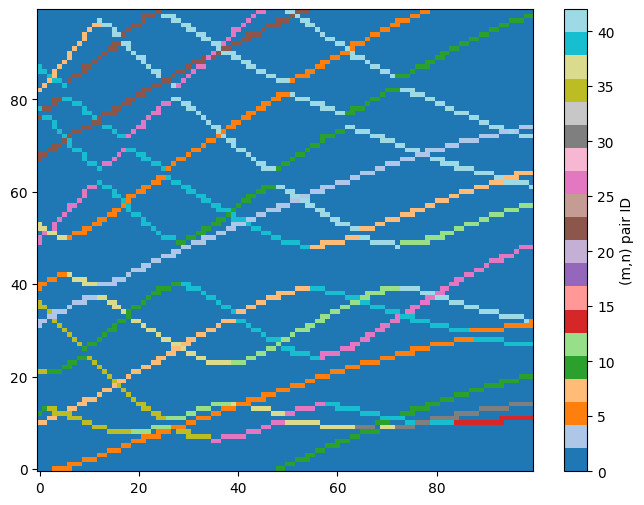

In [129]:
import numpy as np

def walk_single_array_path(arr, start_row, start_col, adjacency_radius=1):
    """
    Walk a single 2D array 'arr' from (start_row, start_col) to the right, picking exactly one row in each next column.
    Allow a move from (r,c) to (r_new, c+1) if:
      1) |r_new - r| <= adjacency_radius,
      2) arr[r_new, c+1] != [0,0].
    Among multiple valid r_new, pick the one closest to r (tie-break by smallest r_new). Returns a list of (row, col, arr[row,col]) from start to where we can't continue.
    """
    rows, cols = arr.shape
    
    def valid_nonzero(rr, cc):
        return (0 <= rr < rows and 0 <= cc < cols
                and not np.array_equal(arr[rr, cc], [0,0]))
    
    if not valid_nonzero(start_row, start_col):
        return []
    
    path = []
    cur_r = start_row
    cur_c = start_col
    path.append((cur_r, cur_c, arr[cur_r, cur_c]))
    
    while cur_c < cols - 1:
        next_c = cur_c + 1
        candidates = []
        for rr in range(cur_r - adjacency_radius, cur_r + adjacency_radius + 1):
            if valid_nonzero(rr, next_c):
                candidates.append(rr)
        
        if not candidates:
            break
        
        # picks the row that is closest to cur_r (tie-break by smallest r_new)
        best_r = min(candidates, key=lambda x: (abs(x - cur_r), x))
        cur_r = best_r
        cur_c = next_c
        path.append((cur_r, cur_c, arr[cur_r, cur_c]))
    
    return path

def find_bridge_two_column_options(storage, current_array_index, end_row, end_col, end_value, adjacency_radius=1):
    """
    Searches every array in `storage` (except the current_array_index) for a cell (r_new, c_new) with:
      - c_new in [end_col+1 ... end_col+adjacency_radius]
      - 0 <= c_new < number of columns in that array
      - |r_new - end_row| <= adjacency_radius
      - arr[r_new, c_new] != [0,0]

    Returns (new_array_index, r_new, c_new, val_new, dm, dn) or None if not found. compute dm = val_new[0] - end_value[0], dn = val_new[1] - end_value[1].
    """
    n_arrays = storage.size
    

    possible_cols = range(end_col + 1, end_col + adjacency_radius + 1)

    for j in range(n_arrays):
        if j == current_array_index:
            continue
        
        arr_j = storage[j]
        rows_j, cols_j = arr_j.shape
        
        for c_new in possible_cols:
            if c_new < 0 or c_new >= cols_j:
                continue  # skip out-of-bounds

            r_min = max(0, end_row - adjacency_radius)
            r_max = min(rows_j - 1, end_row + adjacency_radius)
            
            for r_new in range(r_min, r_max + 1):
                val_new = arr_j[r_new, c_new]
                if not np.array_equal(val_new, [0,0]):
                    dm = val_new[0] - end_value[0]
                    dn = val_new[1] - end_value[1]
                    return (j, r_new, c_new, val_new, dm, dn)
    
    return None


def walk_entire_storage_from_threshold(storage, start_array_index, adjacency_radius=1):
    """
    Perform the walk+bridge procedure STARTING from `storage[start_array_index]`, collecting all swaps in a list.

    - start at col = floor(0.33 * num_cols).
    - only consider rows [0.. floor(0.1 * num_rows)] for that column.
    
    Returns a list 'swaps' of tuples describing each swap event:
        ( (old_i, old_r, old_c),
          (new_i, new_r, new_c),
          (dm, dn) )
    """
    swaps = []

    n_arrays = storage.size
    current_array_index = start_array_index
    arr = storage[current_array_index]
    rows, cols = arr.shape
    
    # determine the col and row threshold
    start_col = int(0.33 * cols)
    row_threshold = int(0.1*rows)

    if start_col >= cols:
        print(f"Array[{start_array_index}]: Computed start_col={start_col} out of range (cols={cols}).")
        return swaps
    
    # find valid topmost row in col = start_col, restricted to row <= row_threshold
    start_candidates = [
        r for r in range(min(row_threshold + 1, rows))  # ensure we don't go beyond total rows
        if not np.array_equal(arr[r, start_col], [0,0])
    ]
    if not start_candidates:
        print(f"storage[{start_array_index}]: No non-zero in col={start_col} for rows up to {row_threshold}. Can't start.")
        return swaps  # empty
    
    current_row = min(start_candidates)
    current_col = start_col
    
    print(f"=== starting chain in storage[{current_array_index}] at "
          f"(row={current_row}, col={current_col}), row_threshold={row_threshold} ===")
    
    while True:
        arr = storage[current_array_index]
        
        # walk in this array from (current_row, current_col)
        path = walk_single_array_path(arr, current_row, current_col, adjacency_radius)
        if not path:
            print(f"no path found in storage[{current_array_index}] "
                  f"from (row={current_row}, col={current_col}). Done.")
            break
        
        end_r, end_c, end_val = path[-1]
        print(f"walked array[{current_array_index}] => ended at (row={end_r}, col={end_c}), val={end_val}.\n")
        
        # bridging
        bridge = find_bridge_two_column_options(storage, current_array_index, end_r, end_c,
                                                end_val, adjacency_radius)
        if bridge is None:
            print(f"no bridging found after array[{current_array_index}].\n")
            break
        
        (next_i, r_new, c_new, val_new, dm, dn) = bridge
        print(f"  ==> bridge from array[{current_array_index}] end at (row={end_r}, col={end_c})")
        print(f"      to array[{next_i}] at (row={r_new}, col={c_new}). Δm={dm}, Δn={dn}\n")
        
        swaps.append((
            (current_array_index, end_r, end_c),
            (next_i, r_new, c_new),
            (dm, dn)
        ))
        
        current_array_index = next_i
        current_row = r_new
        current_col = c_new  

    return swaps


def walk_all_arrays_in_storage(storage, adjacency_radius=1):
    """
    For each array i in 'storage':
      1) threshold pass (start_col=0.33*cols, row<=0.1*rows)
      2) fraction passes at alpha=0.25, 0.5, 0.75
    Combine, remove duplicates, store in a global list.
    """
    n_arrays = storage.size
    all_swaps = []
    
    for i in range(n_arrays):
        print(f"\n========== Array[{i}]: THRESHOLD PASS ==========")
        threshold_swaps = walk_entire_storage_from_threshold(
            storage,
            start_array_index=i,
            adjacency_radius=adjacency_radius
        )
        
        print(f"\n========== Array[{i}]: MULTI-FRACTION PASSES (1/4, 1/2, 3/4) ==========")
        fraction_swaps = walk_entire_storage_from_three_fractions(
            storage,
            start_array_index=i,
            adjacency_radius=adjacency_radius
        )
        
        # remove duplicates
        combined = set(threshold_swaps) | set(fraction_swaps)
        all_swaps.extend(combined)
    
    return all_swaps



def walk_single_array_path_direction(arr, start_row, start_col, adjacency_radius=1, direction=1):
    """
    Like walk_single_array_path, but can move either left (direction=-1) or right (direction=+1).
    """
    rows, cols = arr.shape
    
    def valid_nonzero(rr, cc):
        return (0 <= rr < rows and 0 <= cc < cols
                and not np.array_equal(arr[rr, cc], [0,0]))
    
    # check if start cell is valid
    if not valid_nonzero(start_row, start_col):
        return []
    
    path = []
    cur_r = start_row
    cur_c = start_col
    path.append((cur_r, cur_c, arr[cur_r, cur_c]))
    
    while True:
        next_c = cur_c + direction
        if next_c < 0 or next_c >= cols:
            break  # out of bounds
        
        candidates = []
        for rr in range(cur_r - adjacency_radius, cur_r + adjacency_radius + 1):
            if valid_nonzero(rr, next_c):
                candidates.append(rr)
        
        if not candidates:
            break
        
        # pick row that is closest to cur_r
        best_r = min(candidates, key=lambda x: (abs(x - cur_r), x))
        cur_r = best_r
        cur_c = next_c
        path.append((cur_r, cur_c, arr[cur_r, cur_c]))
    
    return path

def find_bridge_options_direction(storage, current_array_index, end_row, end_col, end_value, adjacency_radius=1, direction=1):
    """
    Searches for a cell in ANY other array j != current_array_index, in columns strictly "beyond" end_col in the given direction:
      - If direction=+1, c_new in [end_col+1, ..., end_col+adjacency_radius]
      - If direction=-1, c_new in [end_col-1, ..., end_col-adjacency_radius] (descending)
    ...
    """
    n_arrays = storage.size

    if direction == 1:
        col_start = end_col + 1
        col_stop  = end_col + adjacency_radius + 1
        col_step  = 1
    else:  # direction = -1
        col_start = end_col - 1
        col_stop  = end_col - adjacency_radius - 1
        col_step  = -1

    possible_cols = range(col_start, col_stop, col_step)

    for j in range(n_arrays):
        if j == current_array_index:
            continue
        
        arr_j = storage[j]
        rows_j, cols_j = arr_j.shape
        
        for c_new in possible_cols:
            if c_new < 0 or c_new >= cols_j:
                continue  # out-of-bounds

            r_min = max(0, end_row - adjacency_radius)
            r_max = min(rows_j - 1, end_row + adjacency_radius)
            
            for r_new in range(r_min, r_max + 1):
                val_new = arr_j[r_new, c_new]
                if not np.array_equal(val_new, [0,0]):
                    dm = val_new[0] - end_value[0]
                    dn = val_new[1] - end_value[1]
                    return (j, r_new, c_new, val_new, dm, dn)
    
    return None

def walk_entire_storage_from_fraction(storage, start_array_index=0, adjacency_radius=1, fraction=0.5):
    """
    Start at col = start_col + fraction*(last_col - start_col), then walk left, then walk right, bridging in the same directions. Returns a list of swaps from both directions.
    """
    swaps = []
    arr = storage[start_array_index]
    rows, cols = arr.shape
    
    start_c = int(0.33 * cols)# same threshold-based start col
    last_c  = cols - 1
    if start_c >= cols:
        print(f"Array[{start_array_index}]: start_col={start_c} out of range (cols={cols}), no fraction pass.")
        return swaps
    
    # compute fraction_col
    fraction_col = start_c + int( fraction*(last_c - start_c) )
    if fraction_col < start_c:
        fraction_col = start_c
    if fraction_col > last_c:
        fraction_col = last_c
    
    # pick a valid row in fraction_col
    start_candidates = [
        r for r in range(rows)
        if not np.array_equal(arr[r, fraction_col], [0,0])
    ]
    if not start_candidates:
        print(f"storage[{start_array_index}]: No non-zero in fraction_col={fraction_col}, fraction={fraction:.2f}")
        return swaps
    
    start_row = min(start_candidates)
    print(f"=== fraction={fraction:.2f} pass in storage[{start_array_index}] "
          f"col={fraction_col}, row={start_row} ===")
    
    for direction in [-1, 1]:
        cur_array_index = start_array_index
        cur_row = start_row
        cur_col = fraction_col
        
        while True:
            arr_cur = storage[cur_array_index]
            path = walk_single_array_path_direction(
                arr_cur,
                cur_row,
                cur_col,
                adjacency_radius=adjacency_radius,
                direction=direction
            )
            if not path:
                print(f"No path found in storage[{cur_array_index}], dir={direction}, "
                      f"(row={cur_row}, col={cur_col}). Done.")
                break
            
            end_r, end_c, end_val = path[-1]
            print(f"walked array[{cur_array_index}] => ended at (r={end_r}, c={end_c}), val={end_val}.\n")

            # bridging in the same direction
            bridge = find_bridge_options_direction(
                storage,
                cur_array_index,
                end_r, end_c,
                end_val,
                adjacency_radius=adjacency_radius,
                direction=direction
            )
            if bridge is None:
                print(f"No bridging found after array[{cur_array_index}], dir={direction}.\n")
                break

            (next_i, r_new, c_new, val_new, dm, dn) = bridge
            print(f"  ==> bridge from array[{cur_array_index}] at (r={end_r}, c={end_c}) "
                  f"to array[{next_i}] at (r={r_new}, c={c_new}). Δm={dm}, Δn={dn}\n")

            swaps.append((
                (cur_array_index, end_r, end_c),
                (next_i, r_new, c_new),
                (dm, dn)
            ))

            cur_array_index = next_i
            cur_row = r_new
            cur_col = c_new
    
    return swaps


def walk_entire_storage_from_three_fractions(storage, start_array_index=0, adjacency_radius=1):
    """
    Do 3 passes: alpha = 0.25, 0.5, 0.75 return the union of all swaps from them.
    """
    all_swaps = []
    for alpha in [0.25, 0.5, 0.75]:
        pass_swaps = walk_entire_storage_from_fraction(storage, start_array_index=start_array_index, adjacency_radius=adjacency_radius, fraction=alpha)
        all_swaps.extend(pass_swaps)
    return all_swaps



all_swap_events = walk_all_arrays_in_storage(oneModesNumbers_heatmap_storage, adjacency_radius=1)

print("collected swap events:")
for event in all_swap_events:
    ((old_i, old_r, old_c), (new_i, new_r, new_c), (dm, dn)) = event
    print(f"swap from array[{old_i}], (r={old_r}, c={old_c}) -> "
          f"array[{new_i}], (r={new_r}, c={new_c}), Δm={dm}, Δn={dn}")


def compile_swap_locations_for_array(all_swap_events, array_index):
    """
    Returns a list of (row, col, dm, dn) for each swap that occurred in 'array_index'.
    """
    swap_locations = []
    for ((old_i, old_r, old_c), (new_i, new_r, new_c), (dm, dn)) in all_swap_events:
        if old_i == array_index:
            swap_locations.append((old_r, old_c, dm, dn))
    return swap_locations

import numpy as np
import matplotlib.pyplot as plt

pairID_array = pair_mn_to_ids(modesNumbers_heatmap)

plt.figure(figsize=(8,6))
plt.imshow(
    pairID_array[100:200,100:200],
    origin="lower",
    interpolation="none",
    cmap='tab20',
    aspect='auto'
)
plt.colorbar(label="(m,n) pair ID")


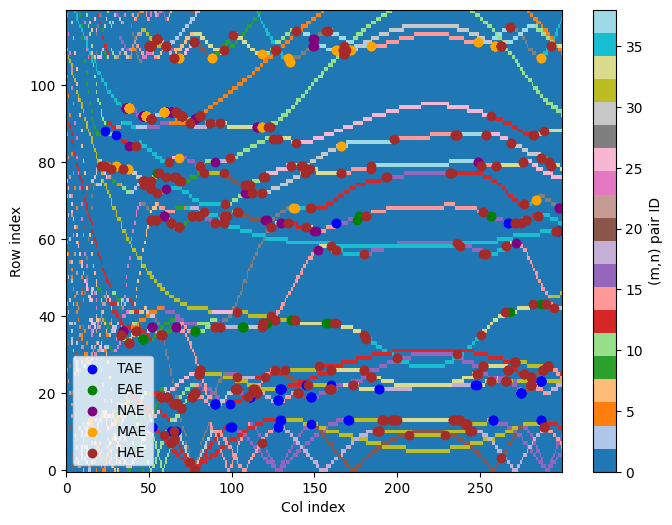

In [130]:
def classify_mode(dm, dn):

    if dm == 0 and dn == 0:
        return 'GAE'
    elif abs(dm) == 1 and dn == 0:
        return 'TAE'
    elif abs(dm) == 2 and dn == 0:
        return 'EAE'
    elif abs(dm) >= 3 and dn == 0:
        return 'NAE'
    elif dm == 0 and dn != 0:
        return 'MAE'
    elif abs(dm) >= 1 and dn != 0:
        return 'HAE'
    return 'Other'


import numpy as np
import matplotlib.pyplot as plt



r_max = int(0.1 * fbins)  
c_min = 0               

sub_pairID_array = pairID_array[0:r_max, c_min:]

plt.figure(figsize=(8, 6))
plt.imshow(
    sub_pairID_array,
    origin="lower",
    interpolation="none",
    cmap='tab20',
    aspect='auto'
)
plt.colorbar(label="(m,n) pair ID")

data_dict = {
    'GAE': [],
    'TAE': [],
    'EAE': [],
    'NAE': [],
    'MAE': [],
    'HAE': [],
    'Other': []
}

n_arrays = oneModesNumbers_heatmap_storage.size

for i in range(n_arrays):
    swap_locs = compile_swap_locations_for_array(all_swap_events, i)
    if not swap_locs:
        continue
    
    # for each (r, c, dm, dn) check if lies in sub-region
    for (r, c, dm, dn) in swap_locs:
        if 0 <= r < r_max and c >= c_min:
            # shift column by c_min so col=100 => x=0 in the subimage
            x_sub = c - c_min
            y_sub = r
            
            # classify (dm, dn)
            cat = classify_mode(dm, dn)
            
            # store (x,y) data_dict[cat]
            data_dict[cat].append((x_sub, y_sub))


color_map = {
    'GAE':  'red',
    'TAE':  'blue',
    'EAE':  'green',
    'NAE':  'purple',
    'MAE':  'orange',
    'HAE':  'brown',
    'Other': 'gray'
}

# Plot each category as circles (marker='o') on the subimage
for cat, points in data_dict.items():
    if not points:
        continue  # skip if no points in this category

    xvals, yvals = zip(*points)  # unzip into separate lists
    plt.scatter(
        xvals,
        yvals,
        color=color_map[cat],
        marker='o',       # circles
        label=cat
    )


plt.xlabel(f"Col index")
plt.ylabel("Row index")
plt.legend(loc="best")
plt.show()



In [ ]:
# mode crossings, note when they happen on same column

In [ ]:
#have to implement actual gap detector.